 ## Exploratory Data Analysis

<b>Goal</b>: produce a statistical summary of the Iris dataset<br>
You can download the Iris data files from [this link](https://datahub.io/machine-learning/iris#data)

### 1) Loading data

Task: use <em>pandas</em> and <em>scipy</em> to load Iris from csv, arff and json formats and convert them onto dataframes

In [1]:
import pandas as pd
  
# Reading the CSV file
df = pd.read_csv("Iris.csv")
  
# Printing top 5 rows
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Reading the JSON file
df = pd.read_csv("iris.csv")
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('iris_arff.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'iris_arff.arff'

### 2) Summaries

In [9]:
df.shape

(150, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


How many observation do we have for each species?

In [12]:
df.value_counts("class")

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Let us remove two values from *sepalwidth*

In [28]:
import numpy as np
df.loc[0:1,'sepalwidth'] = np.nan

Are there missings per variable?

In [29]:
df.isnull().sum()

sepallength    0
sepalwidth     2
petallength    0
petalwidth     0
class          0
dtype: int64

We can choose to remove the rows or impute missings (e.g., *median* for numeric vars or *mode* for categoric)

In [45]:
df.dropna().head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.051351,1.4,0.2,Iris-setosa
1,4.9,3.051351,1.4,0.2,Iris-setosa
2,4.7,3.200000,1.3,0.2,Iris-setosa
3,4.6,3.100000,1.5,0.2,Iris-setosa
4,5.0,3.600000,1.4,0.2,Iris-setosa


In [46]:
from sklearn.impute import SimpleImputer

# imputation strategies: mean, median, most_frequent
imp = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True) 
df[['sepalwidth']] = imp.fit_transform(df[['sepalwidth']])
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.051351,1.4,0.2,Iris-setosa
1,4.9,3.051351,1.4,0.2,Iris-setosa
2,4.7,3.200000,1.3,0.2,Iris-setosa
3,4.6,3.100000,1.5,0.2,Iris-setosa
4,5.0,3.600000,1.4,0.2,Iris-setosa


Are there duplicates?<br>
Let us check how many observations have different sepal length and width.

In [47]:
unique_sepal = df.drop_duplicates(subset=["sepallength","sepalwidth"])
unique_sepal.shape

(117, 5)

### 3) Simple visualization

Let us use <em>matplotlib</em>, <em>seaborn</em> and <em>plotly</em> to visualize info

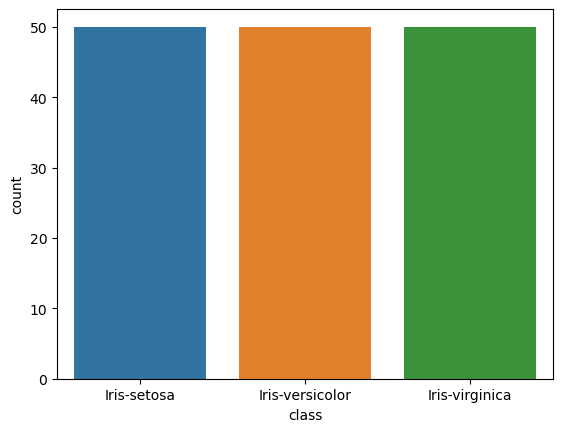

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='class', data=df)
plt.show()

Let us explore basic relationships between variables:<br>
- <em>setosa</em> has smaller sepal lengths but larger sepal widths, while <em>virginica</em> has larger sepal lengths but smaller sepal widths (first image)
- petal lengths and widths vary from smaller to larger for <em>setosa</em>, <em>versicolor</em> and <em>virginica</em> species (second image)

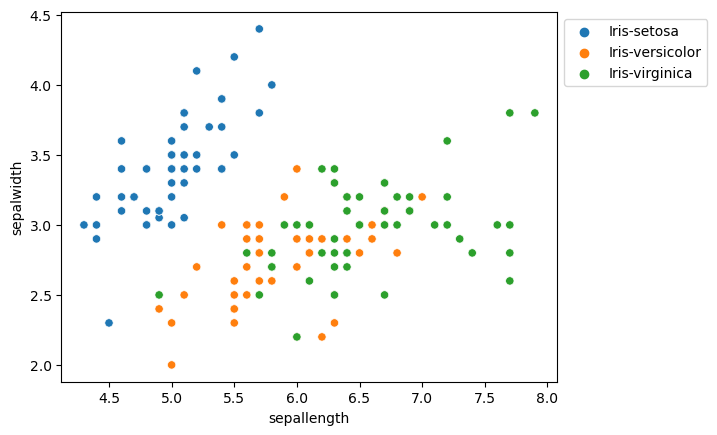

In [49]:
sns.scatterplot(x='sepallength', y='sepalwidth', hue='class', data=df)
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)  
plt.show()

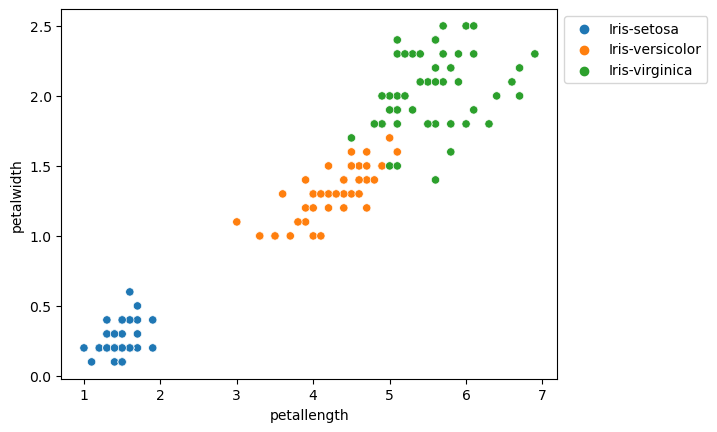

In [50]:
sns.scatterplot(x='petallength', y='petalwidth', hue='class', data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

What about histogram views per variable?

c:\Users\Tomas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Tomas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


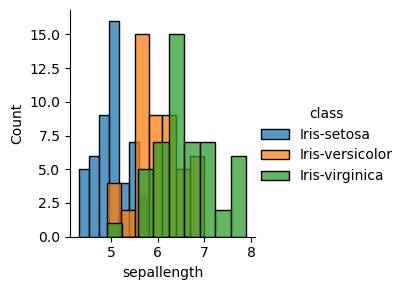

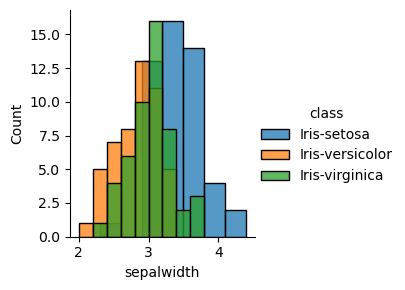

In [51]:
plot = sns.FacetGrid(df, hue="class")
plot.map(sns.histplot, "sepallength").add_legend()
  
plot = sns.FacetGrid(df, hue="class")
plot.map(sns.histplot, "sepalwidth").add_legend()
  
plt.show()

And boxplots?

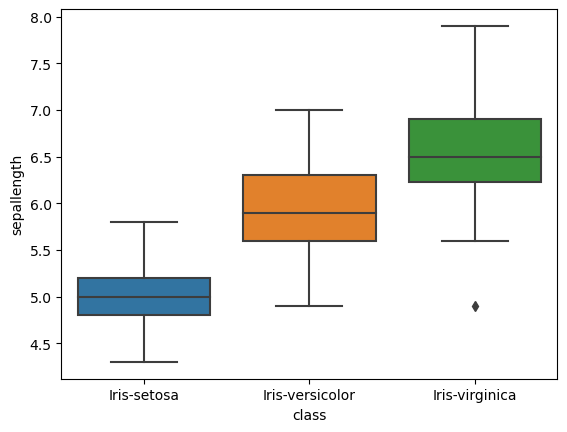

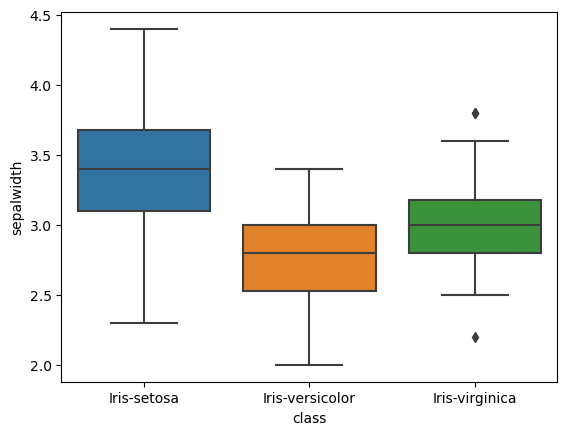

In [52]:
sns.boxplot(x="class", y='sepallength', data=df)      
plt.show()
sns.boxplot(x="class", y='sepalwidth', data=df)      
plt.show()

How to comprehensively display pairwise variable relationships?

c:\Users\Tomas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


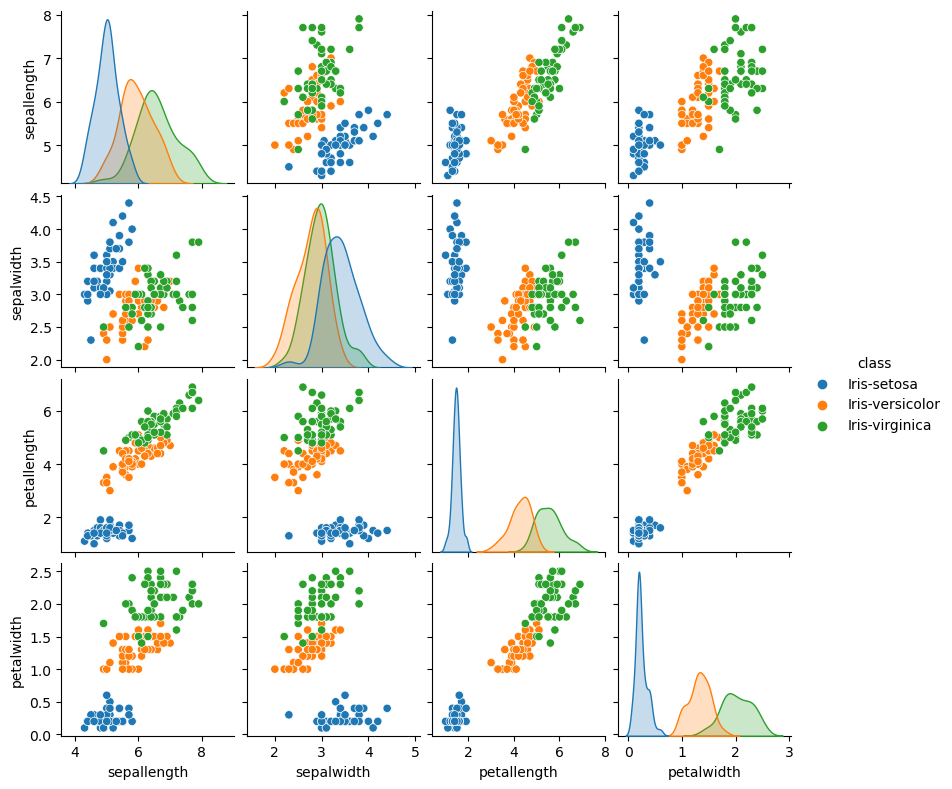

In [53]:
sns.pairplot(df, hue='class', height=2)

Are input variables correlated?

In [57]:
df.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

In [59]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')

# Display the correlation matrix
print(correlation_matrix)

             sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.104420     0.871754    0.817954
sepalwidth     -0.104420    1.000000    -0.413796   -0.349766
petallength     0.871754   -0.413796     1.000000    0.962757
petalwidth      0.817954   -0.349766     0.962757    1.000000


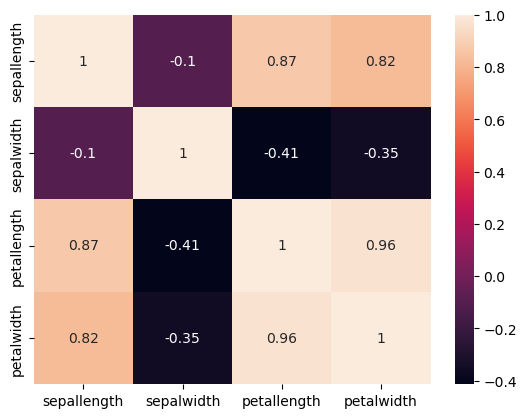

In [62]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(method='pearson'), annot=True)
plt.show()

### 4) Keep going...

Some of the <em>sklearn</em> facilities require input data to be separated from output data

In [63]:
X = df.drop('class', axis=1)
y = df['class']

Let us for instance check the discriminative power of each feature in accordance with <em>f_classif</em> criterion

In [64]:
from sklearn.feature_selection import f_classif

fimportance = f_classif(X, y)

print('features', X.columns.values)
print('scores', fimportance[0])
print('pvalues', fimportance[1])

features ['sepallength' 'sepalwidth' 'petallength' 'petalwidth']
scores [ 119.26450218   45.89858536 1179.0343277   959.32440573]
pvalues [1.66966919e-31 3.25596403e-16 3.05197580e-91 4.37695696e-85]


Now it your turn to unlock the world of <em>sklearn</em> facilities. Good journey!